<h1><center>Practical: Sequence alignment</center></h1>

In this practical you will implement the algorithm for global sequence alignment in Python. We limit ourselves to sequences of DNA nucleotides: A, C, T, G. 

<h2>Part 1 - Basic Needleman-Wunsch algorithm (35)</h2>

- Implement the basic Needleman-Wunsch algorithm from the reader in Python. Give the file with your program the name nw1.py (or insert it in the code block below). Your program should read two sequences of length n and m from an input file. This can be done by the following lines of Python code (assuming the input file is input.txt):


In [17]:
import numpy as np

file = open('nw_test1.txt') # open input file

s = file.readline() # readline 1 of the input
t = file.readline() # readline 2 of the input

file.close() # close file

lens = len(s) # length string s
lent = len(t) # length string t

p=0
q=4
g=5

D = np.zeros((lens,lent), dtype=int)
for i in range(1,lens+1):
    D[i-1,0] = (i-1)*g

for i in range(1,lent+1):
    D[0,i-1] = (i-1)*g

for i in range (1, lens):
    for j in range (1, lent):
        score = 0
        if s[i-1] == t[j-1]:
            score = p
        else:
            score = q
        Match = D[i-1,j-1] + score
        Delete = D[i-1, j] + g
        Insert = D[i, j-1] + g
        D[i,j] = min(Match, Insert, Delete)
        
print("D=", *D, sep='\n')

D=
[ 0  5 10 15]
[ 5  4  9 10]
[10  9  8  9]
[15 10 13 12]
[20 15 14 17]
[25 20 15 18]
[30 25 20 15]
[35 30 25 20]


The scoring matrix w(ai , bj) has the form:

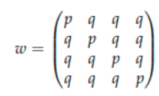

That is, the costs of a match are p and of a mismatch q, e.g., w(A, A) = p, w(A, T) = q, etc. Furthermore, the gap penalty is g. The parameters p, q and g should be variables in your algorithm, to be initialized at the start of your Python-program. The result of your program is a (n + 1) × (m + 1)- dimensional matrix D containing the costs of optimal alignment.

- Inspect the file nw_test1.txt from the archive Practical_SequenceAlignment in Nestor. This file contains the two sequences: 

GGAATGG <br>
ATG

Run your program nw1.py in Python with nw_test1.txt as input, and the following values of the parameters: p = 0, q = 4, g = 5. The matrix D that contains the costs (edit distances) of the alignment should agree with the matrix at the bottom of p. 26 of the syllabus (without the arrows).

<h2>Part 2 - Needleman-Wunsch algorithm with predecessors (35)</h2>

Next you will expand the basic algorithm so that not only the costs of an optimal alignment are computed, but also the predecessors. We limit ourselves to the determination of one predecessor for each position (i, j).
- Implement the Needleman-Wunsch algorithm with predecessors in Python by expanding your program nw1.py. Call your new program nw2.py (or copy it and alter it below). The input and parameters are the same as in Assignment 8. The result of your program should be as follows:
    - a) a (n + 1) × (m + 1)-dimensional matrix D with the the optimal alignment (as in Assignment 8);
    - b) a (n + 1) × (m + 1)-dimensional matrix P, whose elements indicate the direction of the predecessor. For this purpose we use simple characters that occur on your keyboard, that is, ’|’ for “from the north”, ’-’ for “from the west”, and ’\’ for “from the north west”. More precisely:

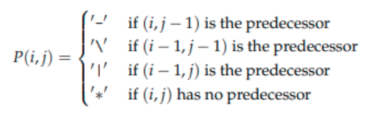

N.B. The last case occurs at the position on the first row and the first column. In case there is more than one predecessor, you have to choose one, with the following priority order: north west; west; north. 

In [16]:
P = np.empty([lens, lent], dtype=str)
for i in range (0, lens):
    for j in range (0, lent):
        score = 0
        if s[i-1] == t[j-1]:
            score = p
        else:
            score = q
                    
        if D[i,j] == 0:
            P[i,j] = "*"
        elif D[i,j] == D[i-1,j-1] + score:
            P[i,j] = "\\"
        elif D[i,j] == D[i, j-1] + g:
            P[i,j] = "-"
        else:
            P[i,j] = "|"   
       
print("D=", *D, sep='\n')

print("\nP=")
for r in P:
    print(''.join(r))

D=
[ 0  5 10 15]
[ 5  4  9 10]
[10  9  8  9]
[15 10 13 12]
[20 15 14 17]
[25 20 15 18]
[30 25 20 15]
[35 30 25 20]

P=
*---
|\\\
|\\\
|\\\
|\\\
||\\
|||\
|||\


- Run your program nw2.py, again with nw_test1.txt as input, and the same values of the parameters: p = 0, q = 4, g = 5. Let Python print the matrices D and P below one another on stdout. The result should be as follows (see also the reader): 

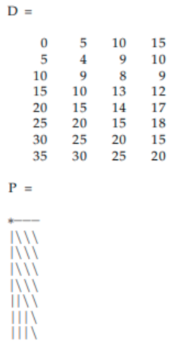

<h2>Part 3 - Needleman-Wunsch algorithm with optimal alignment (30)</h2>

Finally, you will expand the algorithm such that also the optimal alignment is determined. Use your program nw2.py as basis. Call the corresponding program nw3.py (or insert it in the code block below). 
- Compute the alignment of the two input strings s and t. By determining the trace-back path (repeatedly following the predecessor) you can walk back from the endpoint (n + 1, m + 1) to the starting point (1, 1). (Because we have chosen only a single predecessor in each point there is also only one optimal alignment.) The strings after alignment we call s_al and t_al. So these are calculated “from back to front”. Determine during the calculation also a string l_al (with the same length as s_al and t_al) which has a ’|’ symbol on position k if a match occurs between the input strings at that position, and a space otherwise.

In [15]:
#Printing Alignment 
t_al = np.empty([lens], dtype=str)
l_al = np.empty([lens], dtype=str)
j= lent-1;
for i in range(lens-1, -1, -1):
    if P[i,j] == "\\":
        j-=1
        l_al[i] = "|"
        t_al[i] = s[i-1]
    elif P[i,j] == "|":
        l_al[i] = " "
        t_al[i] = "-"  
        
s_al = s[0:lens-1]   
print("\nAlignment=\n"+s_al)   
print(*l_al, sep='')
print(*t_al, sep='')


Alignment=
GGAATGG
   || |
---AT-G


Run your program nw3.py, again with nw_test1.txt as input, and the same values of the parameters: p = 0, q = 4, g = 5. Let Python print the strings s_al, l_al and t_al orderly formatted below one another on stdout. The result should be as follows:

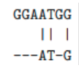

Instead of printing the results on stdout by the print() function you can also print the results to a file by the file print function, as follows. Include the following lines at the end of your program nw3.py, and add the missing code for printing. The code for printing the input sequences has already been inserted.

In [18]:
import numpy as np
output = open('nw3-output.txt', 'w') # open file
output.write("Name: Dominic Therattil & Sebastian Preststulen ") # enter your name(s)
output.write("IBC, Practical 3 \n")

file = open('nw_test1.txt') # open input file
s = file.readline() # readline 1 of the input
t = file.readline() # readline 2 of the input
file.close() # close file
lens = len(s) # length string s
lent = len(t) # length string t

output.write("\n\nString s: \n")
for i in range(lens):
    output.write(s[i])  
output.write("\n\nString t: \n")
for i in range(lent):
    output.write(t[i])

#MATRIX D
output.write("\n\nMatrix D: \n")
p=0
q=4
g=5
D = np.zeros((lens,lent), dtype=int)
for i in range(1,lens+1):
    D[i-1,0] = (i-1)*g

for i in range(1,lent+1):
    D[0,i-1] = (i-1)*g

for i in range (1, lens):
    for j in range (1, lent):
        score = 0
        if s[i-1] == t[j-1]:
            score = p
        else:
            score = q
        Match = D[i-1,j-1] + score
        Delete = D[i-1, j] + g
        Insert = D[i, j-1] + g
        D[i,j] = min(Match, Insert, Delete)        
for r in D:
    output.write(str(r).strip("[]")+"\n")

#MATRIX P
output.write("\n\nMatrix P: \n")
P = np.empty([lens, lent], dtype=str)
for i in range (0, lens):
    for j in range (0, lent):
        score = 0
        if s[i-1] == t[j-1]:
            score = p
        else:
            score = q
                    
        if D[i,j] == 0:
            P[i,j] = "*"
        elif D[i,j] == D[i-1,j-1] + score:
            P[i,j] = "\\"
        elif D[i,j] == D[i, j-1] + g:
            P[i,j] = "-"
        else:
            P[i,j] = "|"  
for r in P:
    output.write(''.join(r)+"\n")

#Arr Alignment
output.write("\n\nAlignment: \n")
t_al = np.empty([lens], dtype=str)
l_al = np.empty([lens], dtype=str)
j= lent-1;
for i in range(lens-1, -1, -1):
    if P[i,j] == "\\":
        j-=1
        l_al[i] = "|"
        t_al[i] = s[i-1]
    elif P[i,j] == "|":
        l_al[i] = " "
        t_al[i] = "-"   
s_al = s[0:lens-1]   
for r in s_al:
    output.write(r)
output.write("\n")
for r in l_al:
    output.write(r)
output.write("\n")
for r in t_al:
    output.write(r)

output.close() # close file

Run your program nw3.py again and check that the file nw3-output.txt contains the correct information.

Hand in:

- a concise report in PDF format (generated by LaTeX), in which: 
    - a. you describe, for each part of every assignment, how you arrived at the solution, 
    - b. you answer all the questions posed in the assignments. 

Write at the top of the first page of your report: “Introduction to Scientific Computing, Practical Sequence Alignment”, followed by your name(s), student number(s), and the date when you hand in the report.
- your Python programs nw1.py,... , nw3.py. 

Since you work in pairs, you need to include information in your report about your individual contributions. For each assignment, indicate the contribution (mention percentages) for each of you in terms of tasks performed (program design, program implementation, answering questions posed, writing the report). All files have to be handed in as a single archive (called YourName.zip), where “YourName” is the concatenation of your last names (or your last name, if you work individually). 